In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [2]:
matplotlib.rcParams.update({'figure.figsize' : [10, 5]})
%matplotlib inline

# Dataset - Forest Cover Type
You are asked predict the forest cover type (the predominant kind of tree cover) from strictly cartographic variables (as opposed to remotely sensed data). The actual forest cover type for a given 30 x 30 meter cell was determined from US Forest Service (USFS) Region 2 Resource Information System data. Independent variables were then derived from data obtained from the US Geological Survey and USFS. The data is in raw form (not scaled).

This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices.


You are asked to predict an integer classification for the forest cover type. The seven types are:

1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

In [3]:
df_forest = pd.read_csv('./00_data/df_forest_cover.csv')

In [ ]:
df_forest.

In [4]:
df_forest.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,6693,3160,88,12,30,-5,4400,238,220,110,...,0,0,0,0,0,0,0,0,0,1
1,1595,3186,28,6,60,7,3810,218,228,146,...,0,0,0,0,0,0,0,0,0,1
2,5648,2427,97,28,234,93,984,251,187,44,...,0,0,0,0,0,0,0,0,0,3
3,632,2706,137,18,60,-1,2714,245,230,106,...,0,0,0,0,0,0,0,0,0,5
4,1629,2635,45,8,30,9,955,223,223,135,...,0,1,0,0,0,0,0,0,0,2


In [5]:
df_forest.columns.tolist()

['Id',
 'Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type7',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type15',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40',
 'Cover_Type']

# Task
Use Tree based models to build the best model which predicts the different cover types.

## Some quick EDA

In [6]:
#sets the number of features considered
size = 10 

#create a dataframe with only 'size' features
data=df_forest.iloc[:,:size] 

#get the names of all the columns
cols=data.columns 

# Calculates pearson co-efficient for all combinations
data_corr = data.corr()

# Set the threshold to select only only highly correlated attributes
threshold = 0.5

# List of pairs along with correlation above threshold
corr_list = []

#Search for the highly correlated pairs
for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

Hillshade_9am and Hillshade_3pm = -0.78
Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology = 0.65
Aspect and Hillshade_3pm = 0.63
Hillshade_Noon and Hillshade_3pm = 0.62
Slope and Hillshade_Noon = -0.62
Aspect and Hillshade_9am = -0.60
Elevation and Horizontal_Distance_To_Roadways = 0.58


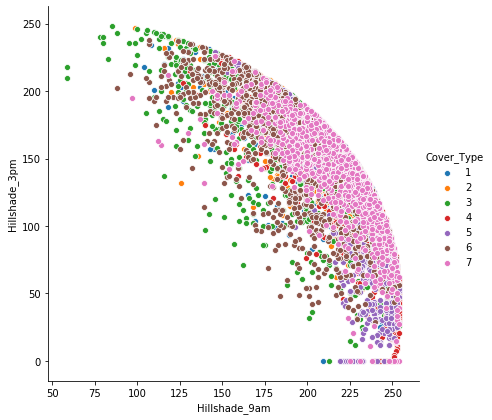

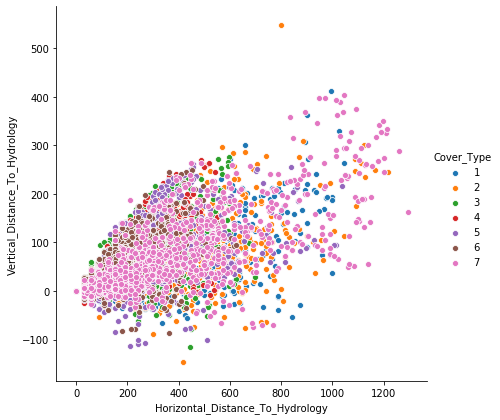

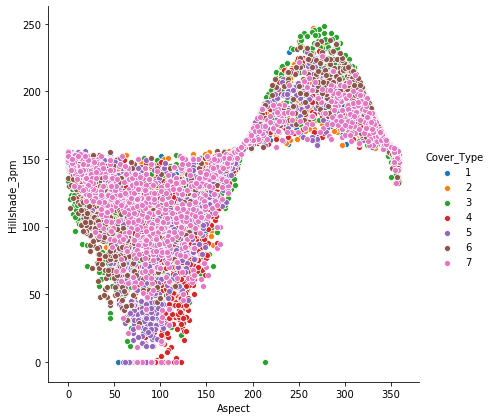

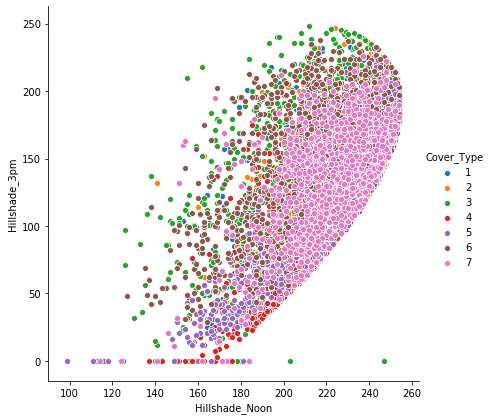

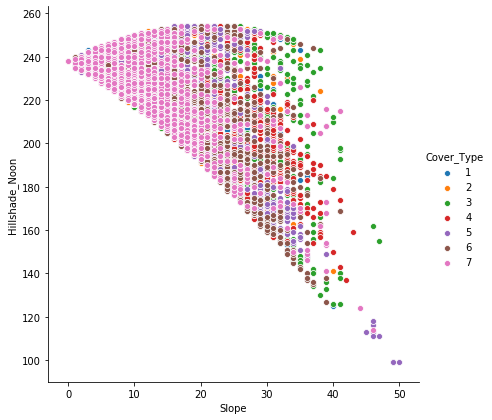

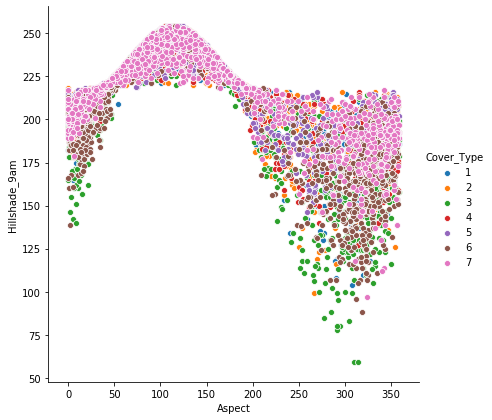

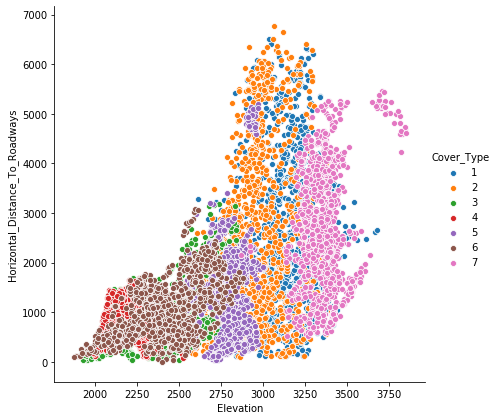

In [7]:
for v,i,j in s_corr_list:
    sns.pairplot(df_forest, hue="Cover_Type", height=6, x_vars=cols[i],y_vars=cols[j] )
    plt.show()

#The plots show to which class does a point belong to. The class distribution overlaps in the plots.    
#Hillshade patterns give a nice ellipsoid patterns with each other
#Aspect and Hillshades attributes form a sigmoid pattern
#Horizontal and vertical distance to hydrology give an almost linear pattern.

# Tips:
- Do not forget to create a testing dataset to check if your model is overfitting
- We are dealing with a multi-class classification. Use `f1-weighted` as your scoring metric
- After you complete your prediction, and are happy with your result, output to csv with index_False. Expected result is a 1d vector.

# Rock 'n'  Roll